Import

In [1]:
%load_ext autoreload
%autoreload 2
import importlib
import ferbo as fb
from tqdm.notebook import tqdm
importlib.reload(fb)
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt
from utils import plot_vs_parameters
from theory import eingensystem_hamiltonian
import matplotlib.colors as mcolors
from scipy.optimize import minimize

  0%|          | 0/100 [00:00<?, ?it/s]

1


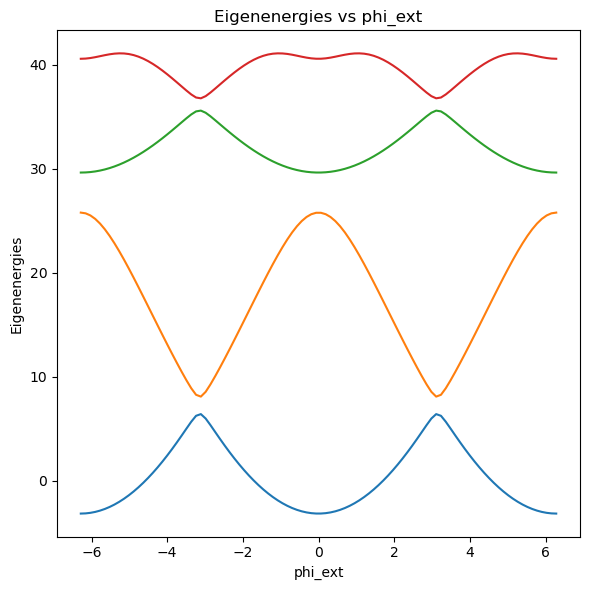

In [17]:
fixed_params = {
    'Ec': 15,
    'El': 5,
    'Delta': 20,
    'r': 0.05,
    'dimension': 100
}

phi_ext_array = np.linspace(-2*np.pi, 2*np.pi, 100)
eigenenergies, eigenstates = fb.eigensytem_vs_parameter('phi_ext', phi_ext_array, fixed_params, eigvals=4)

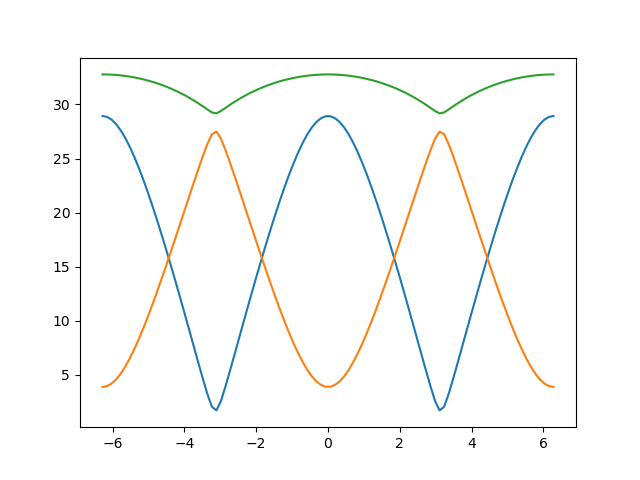

In [23]:
plt.close('all')
%matplotlib widget
plt.plot(phi_ext_array,eigenenergies[:,1]-eigenenergies[:,0])
plt.plot(phi_ext_array,eigenenergies[:,2]-eigenenergies[:,1])
plt.plot(phi_ext_array,eigenenergies[:,2]-eigenenergies[:,0])
plt.show()

In [18]:
from scipy.special import hermite, factorial
def phi_n(Ec,El, n: int,phi_list):
    # CONVERT THE FOCK SPACE STATES IN HARMONIC OSCILLATOR WAVEFUNCTIONS
    phi_ZPF=(8.0 * Ec / El) ** 0.25      
    normalization  = 1/np.sqrt(np.sqrt(np.pi)*(2**n) * 1.0 * phi_ZPF * factorial(n))
    return normalization* np.exp(-(phi_list/phi_ZPF)**2 / 2.0) * np.polyval(hermite(n), (phi_list/phi_ZPF))


def wavefunction_phi_fbq_up(Ec,El,phi_list,phi,N):
    # Wavefunction(\varphi) FOR \sigmaz = +1 OF AN EIGENSTATE OF THE Fermionic-Bosonic Qubit.

    wfunc = np.zeros(len(phi_list),dtype = complex)
    for n in range(N//2+1):
        wfunc = wfunc + phi_n(Ec,El,n,phi_list)*phi.full()[2*n,0]
    return wfunc

def wavefunction_phi_fbq_down(Ec,El,phi_list,phi,N):
    # Wavefunction(\varphi) FOR \sigmaz = -1 OF AN EIGENSTATE OF THE Fermionic-Bosonic Qubit.

    wfunc = np.zeros(len(phi_list),dtype = complex)
    for n in range(N//2):
        wfunc = wfunc + phi_n(Ec,El,n,phi_list)*phi.full()[2*n+1,0]
    return wfunc

In [19]:
params = {
    'Ec': 15,
    'El': 5,
    'Delta': 20,
    'r': 0.05,
    'phi_ext': np.pi,
    'dimension': 100
}
hamil = fb.hamiltonian(**params)
eigvals,eigvecs = hamil.eigenstates(eigvals=3)

In [355]:
# np.real(eigvals[1] - eigvals[0])
np.real(eigvals[2] - eigvals[1])

1.7792570957605456

In [21]:
phi_list=np.linspace(-5*np.pi,5*np.pi,500)
zero_down = np.abs(wavefunction_phi_fbq_down(params['Ec'],params['El'],phi_list,eigvecs[0],params['dimension']))**2
one_up = np.abs(wavefunction_phi_fbq_up(params['Ec'],params['El'],phi_list,eigvecs[1],params['dimension']))**2

zero_up = np.abs(wavefunction_phi_fbq_up(params['Ec'],params['El'],phi_list,eigvecs[0],params['dimension']))**2
one_down = np.abs(wavefunction_phi_fbq_down(params['Ec'],params['El'],phi_list,eigvecs[1],params['dimension']))**2

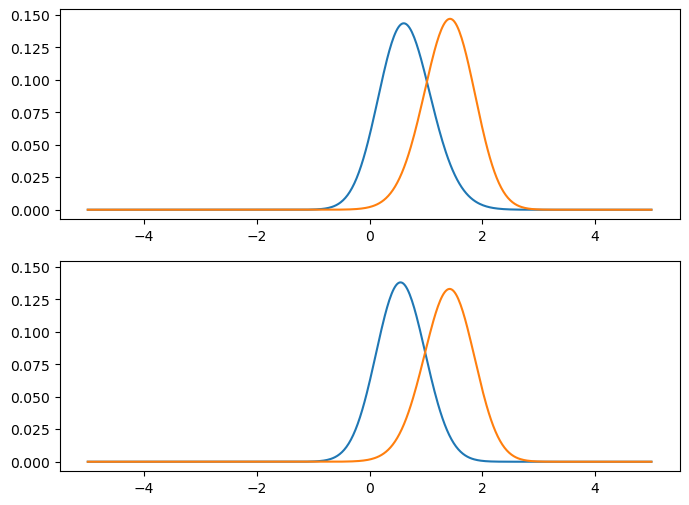

In [22]:
plt.close('all')
fig,ax = plt.subplots(2,1, figsize=(8,6), sharey=True)
ax[0].plot(phi_list/np.pi,zero_down)
ax[0].plot(phi_list/np.pi,one_up)

ax[1].plot(phi_list/np.pi,one_down)
ax[1].plot(phi_list/np.pi,zero_up)
plt.show()

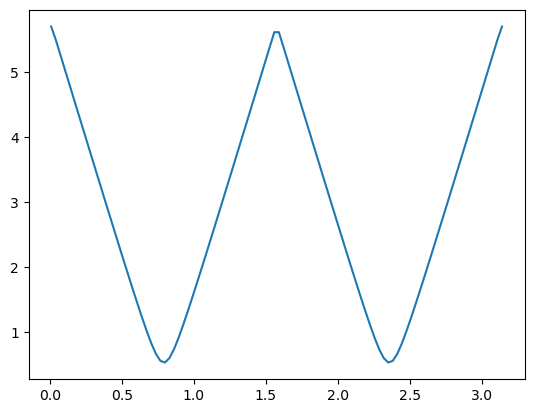

In [156]:
plt.close('all')
plt.plot(phi_ext_array,eigenenergies[:,1]-eigenenergies[:,0])
# plt.plot(phi_ext_array,eigenenergies[:,2]-eigenenergies[:,0])
# plt.plot(phi_ext_array,eigenenergies[:,2]-eigenenergies[:,1])
# plt.plot(phi_ext_array,eigenenergies[:,3]-eigenenergies[:,2])
# plt.plot(phi_ext_array,eigenenergies[:,3]-eigenenergies[:,1])
# plt.plot(phi_ext_array,eigenenergies[:,3]-eigenenergies[:,2])
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

2


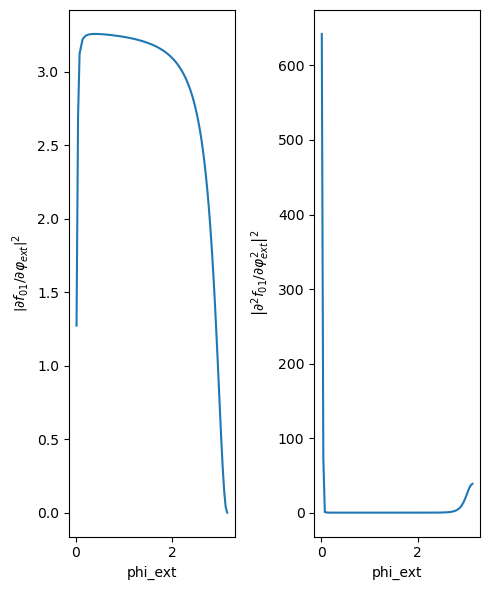

In [155]:
fixed_params = {
    'Ec': 15,
    'El': 0.3,
    'Delta' : 40,
    'r' : 0.05,
    'dimension': 100
}

phi_ext_array = np.linspace(0.01, np.pi, 100)

first_derivative = fb.derivative_eigenenergies('phi_ext', phi_ext_array, fixed_params, eigvals=2)

  0%|          | 0/200 [00:00<?, ?it/s]

1


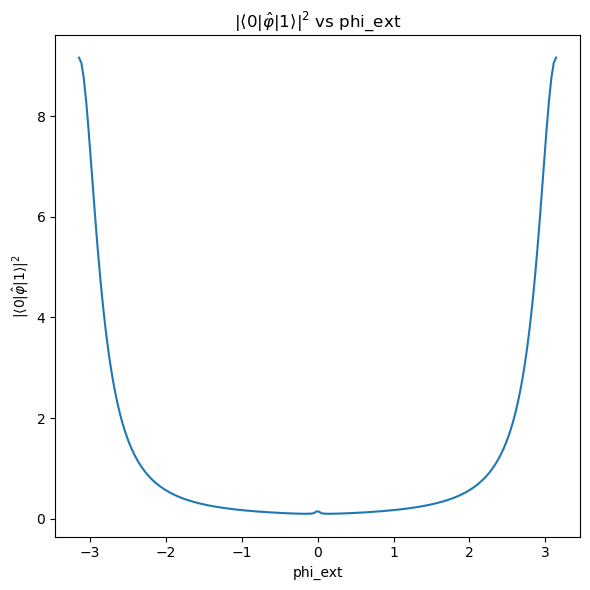

In [162]:
fixed_params = {
    'Ec': 15,
    'El': 0.3,
    'Delta': 40,
    'r': 0.05,
    'dimension': 100
}

phi_ext_array = np.linspace(-np.pi, np.pi,200)
# phi_ext_array = np.linspace(-2, 2, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='phi_ext', parameter_values=phi_ext_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/50 [00:00<?, ?it/s]

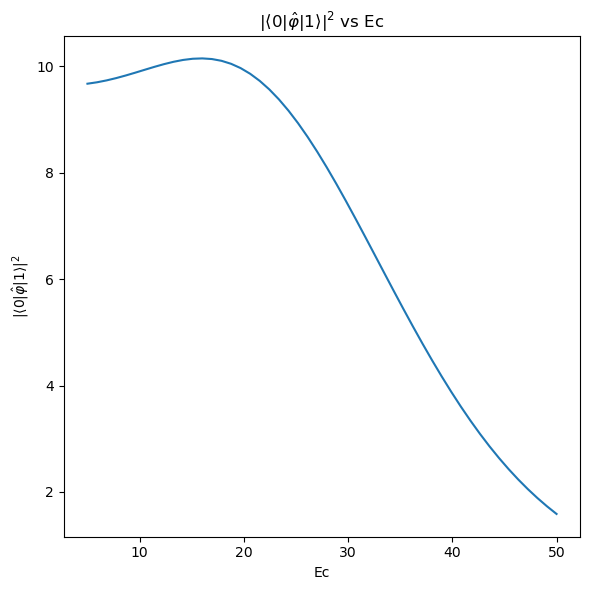

In [30]:
fixed_params = {
    'El': 0.05,
    'Delta': 20,
    'r': 0.05,
    'phi_ext': np.pi,
    'dimension': 100
}

Ec_array = np.linspace(5, 50, 50)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='Ec', parameter_values=Ec_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/50 [00:00<?, ?it/s]

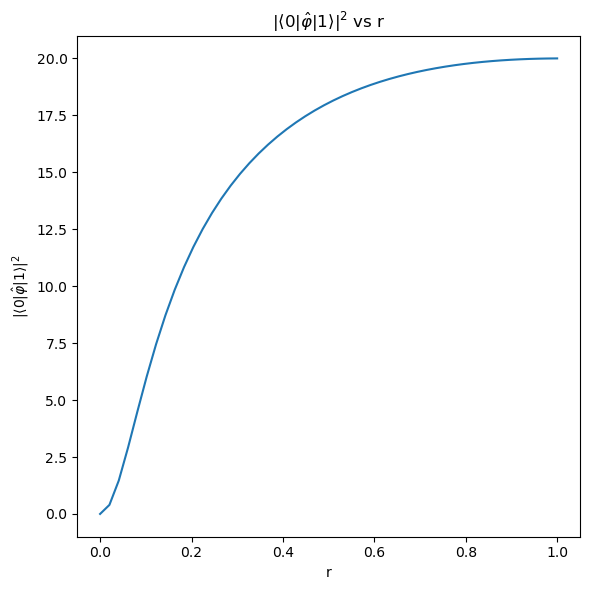

In [32]:
fixed_params = {
    'Ec': 10,
    'El': 0.05,
    'Delta': 20,
    'phi_ext': 0,
    'dimension': 100
}

r_array = np.linspace(0, 1, 50)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='r', parameter_values=r_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

1


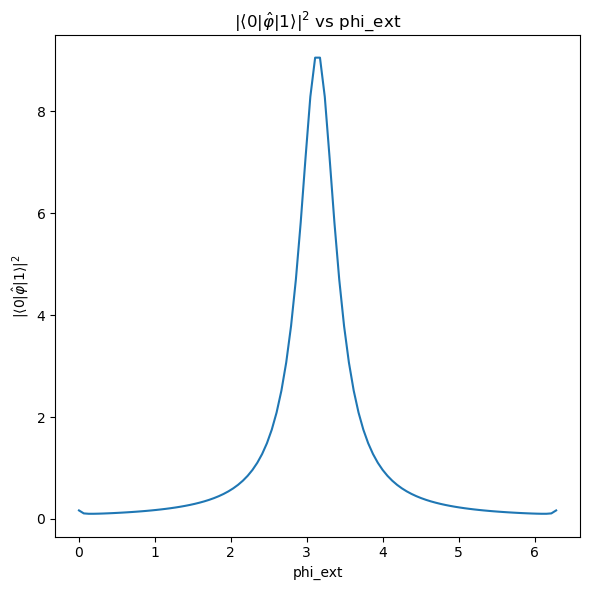

In [163]:
fixed_params = {
    'Ec': 15,
    'El': 0.3,
    'Delta': 40,
    'r': 0.05,
    'dimension': 100
}
# [ 1.500e+01  1.845e-01  2.000e+01  1.000e+00  2.499e-03]
# [15.          1.11619617 40.          0.05        0.28323783]
phi_ext_array = np.linspace(0, 2*np.pi, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='phi_ext', parameter_values=phi_ext_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

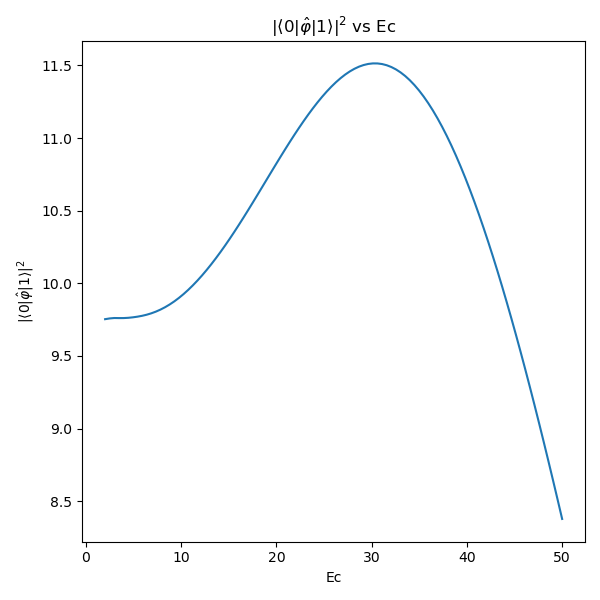

In [62]:
fixed_params = {
    'El': 0.05,
    'Delta': 40,
    'r': 0.05,
    'phi_ext': np.pi,
    'dimension': 100
}

Ec_array = np.linspace(2, 50, 100)

%matplotlib widget
matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='Ec', parameter_values=Ec_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

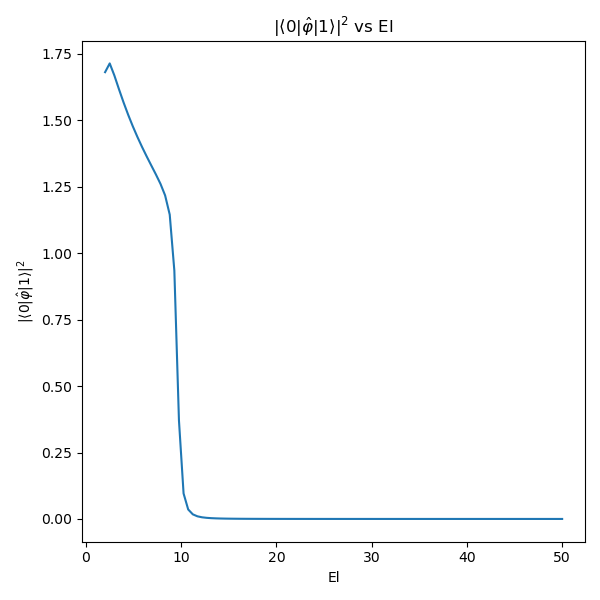

In [65]:
fixed_params = {
    'Ec': 10,
    'Delta': 20,
    'r': 0.05,
    'phi_ext': 0,
    'dimension': 100
}

El_array = np.linspace(0.05, 5, 200)

%matplotlib widget
matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='El', parameter_values=Ec_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

Values to show

  0%|          | 0/100 [00:00<?, ?it/s]

1


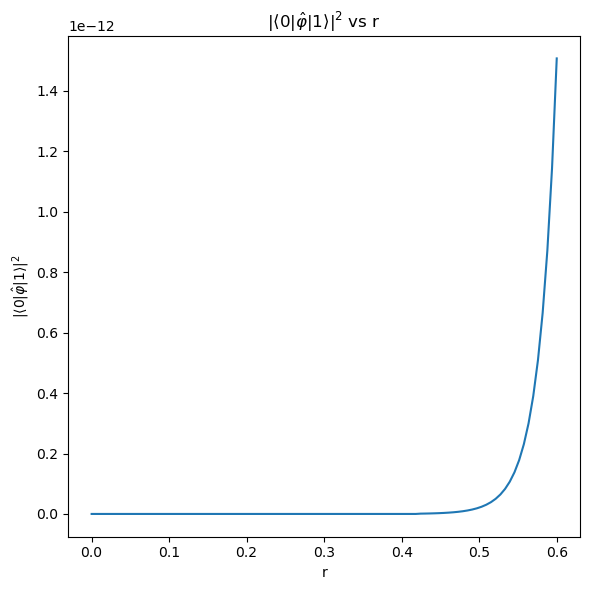

In [231]:
fixed_params = {
    'Ec': 0.1,
    'El': 0.05,
    'Delta': 25,
    'phi_ext': 0,
    'dimension': 100
}

r_array = np.linspace(0, 0.6, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='r', parameter_values=r_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/50 [00:00<?, ?it/s]

1


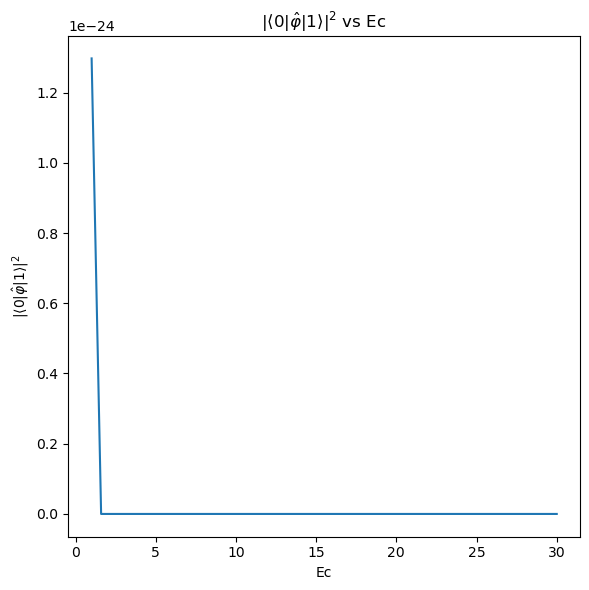

In [242]:
fixed_params = {
    'El': 0.1,
    'Delta': 25,
    'phi_ext': 0,
    'r': 0.3,
    'dimension': 100
}

Ec_array = np.linspace(1, 30, 50)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='Ec', parameter_values=Ec_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

1


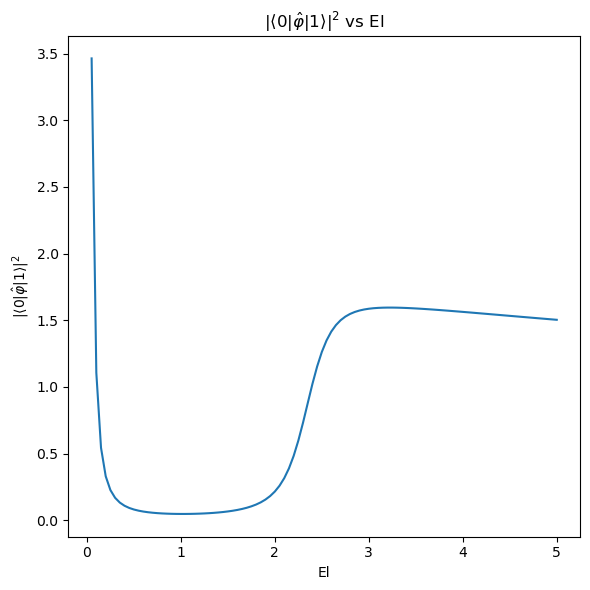

In [172]:
fixed_params = {
    'Ec': 15,
    'Delta': 40,
    'phi_ext': 0,
    'r': 0.05,
    'dimension': 100
}

El_array = np.linspace(0.05, 5, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='El', parameter_values=El_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

Optimization

In [6]:
from scipy import special
from scipy.constants import hbar, e, k, h
special.k0(h*0.5e9/2/k/0.015) * np.sinh(h*0.5e9/2/k/0.015)

0.5020893089304489

In [4]:
T_k = 15e-3
from scipy.constants import hbar, e, k, h
phi_0 = h/2/e

import functools

@functools.lru_cache(maxsize=None)
def Temp_factor(E01):
    return 1/np.tanh(h*np.abs(E01)/2 /k /T_k)

@functools.lru_cache(maxsize=None)
def S_capacitive(Ec,E01):

    def Q_cap(E01):
        return (0.35e6*(6e9/E01)**0.15)

    Cj = e**2/2/Ec/h    
    return 2*hbar/Cj/Q_cap(E01)*Temp_factor(E01)

@functools.lru_cache(maxsize=None)
def S_inductive(El,E01):
        
    def Q_ind_fun(E01):
        return 500e6* (special.k0(h*0.5e9/2/k/T_k) * np.sinh(h*0.5e9/2/k/T_k) / special.k0(h*np.abs(E01)/2/k/T_k) / np.sinh(h*np.abs(E01)/2/k/T_k))
    
    Lj = (phi_0/2/np.pi)**2/El/h

    return 2*hbar/Lj/Q_ind_fun(E01)*Temp_factor(E01)

def S_charge_coupled_impedance(E01):
    ReZ = 6.9e-3
    return 2*ReZ*h*E01*Temp_factor(E01)

def S_flux_bias_line(E01):
    Mut_imp = 1/1.6*1e3*phi_0 #21e-12 #
    Res = 26
    return Mut_imp**2*4*h*E01/Res*Temp_factor(E01)

def S_1f_flux(E01):
    A_phi = 1.18e-6*phi_0
    return A_phi**2/E01

def S_Andreev_1f(E01):

    A_r = 4.34e-6
    
    return A_r**2/E01*Temp_factor(E01)

In [212]:
h

6.62607015e-34

In [214]:
h/2/k/0.015*1e9

1.5997476911220736

Optimization

In [10]:
optimization_results = []
Rq = h/4/e**2
def objective_function(params):
    phi_ext = np.pi #to erase later
    dimension = 100
    # Ec, El, Delta, r, phi_ext = params
    Ec, El, Delta, r = params
    hamiltonian = fb.hamiltonian(Ec, El, Delta, r, phi_ext, dimension = dimension)
    eigenenergies, eigenstates = hamiltonian.eigenstates(eigvals=3)
    f10 = np.real(eigenenergies[1] - eigenenergies[0])
    f21 = np.real(eigenenergies[2] - eigenenergies[1])
    #TODO: Implement a better way to avoid anharmonicities
    # if f10 < 0.01 or f21 < 0.01:
    if f10 < 0.001 or np.abs(f21 -f10) < 0.1:
        return np.inf
    phase_operator = fb.phase_operator_total(Ec, El, dimension)
    charge_number_operator = fb.charge_number_operator_total(Ec, El, dimension)
    dHdr_operator = fb.dHdr_operator(Ec, El, r, Delta, dimension)
    phase_matrix_element = phase_operator.matrix_element(eigenstates[0], eigenstates[1])
    charge_matrix_element = charge_number_operator.matrix_element(eigenstates[0], eigenstates[1])
    dHdr_matrix_element = dHdr_operator.matrix_element(eigenstates[0], eigenstates[1])

    # Relaxation
    # capacitive_rate = np.abs(charge_matrix_element)**2 *(2*e/hbar)**2 * S_capacitive(Ec,f10)
    capacitive_rate = np.abs(charge_matrix_element)**2 * (f10/6)**(-0.7) * 1/np.tanh(1.6*f10) * (32*np.pi*Ec*1e3)
    # inductive_rate = np.abs(phase_matrix_element)**2 * S_inductive(El,f10) * (phi_0/2/np.pi/hbar)**2
    inductive_rate = np.abs(phase_matrix_element)**2 * special.k0(1.6 * f10) * np.cosh(1.6 * f10) * (4 * El / np.pi)
    # Gamma_chargeCoupledImpedance = np.abs(charge_matrix_element)**2 * S_charge_coupled_impedance(f10) *(2*e/hbar)**2
    Gamma_chargeCoupledImpedance = np.abs(charge_matrix_element)**2 *f10 * (1 + 1/np.tanh(1.6*f10)) * (4*np.pi**2/50/Rq*1e9)
    Gamma_FluxBiasLine = np.abs(phase_matrix_element)**2 * S_flux_bias_line(f10) * ((2*np.pi)**2/phi_0*El)**2
    Gamma_1overf = np.abs(phase_matrix_element)**2 * S_1f_flux(f10) * (El*(2*np.pi)**2/phi_0)**2
    Gamma_Andreev_1f = np.abs(dHdr_matrix_element)**2 * S_Andreev_1f(f10)*(2*np.pi)**2

    # Dephasing
    delta_phi_ext = 1e-2
    h_phi_plus = fb.hamiltonian(Ec, El, Delta, r, phi_ext + delta_phi_ext, dimension=dimension)
    h_phi_minus = fb.hamiltonian(Ec, El, Delta, r, phi_ext - delta_phi_ext, dimension=dimension)
    eigen_phi_plus = h_phi_plus.eigenenergies(eigvals=2)
    eigen_phi_minus = h_phi_minus.eigenenergies(eigvals=2)
    f10_phi_plus = np.real(eigen_phi_plus[1] - eigen_phi_plus[0])
    f10_phi_minus = np.real(eigen_phi_minus[1] - eigen_phi_minus[0])
    df10_dphi = (f10_phi_plus - f10_phi_minus) / (2 * delta_phi_ext)
    d2f10_dphi2 = (f10_phi_plus - 2 * f10 + f10_phi_minus) / (delta_phi_ext ** 2)

    delta_r = 1e-2
    h_r_plus = fb.hamiltonian(Ec, El, Delta, r + delta_r, phi_ext, dimension=dimension)
    h_r_minus = fb.hamiltonian(Ec, El, Delta, r - delta_r, phi_ext, dimension=dimension)
    eigen_r_plus = h_r_plus.eigenenergies(eigvals=2)
    eigen_r_minus = h_r_minus.eigenenergies(eigvals=2)
    f10_r_plus = np.real(eigen_r_plus[1] - eigen_r_plus[0])
    f10_r_minus = np.real(eigen_r_minus[1] - eigen_r_minus[0])
    df10_dphi = (f10_r_plus - f10_r_minus) / (2 * delta_r)
    d2f10_dphi2 = (f10_r_plus - 2 * f10 + f10_r_minus) / (delta_r ** 2)

    w_ir = 2*np.pi
    w_uv = 2*np.pi*3e9
    t = 10e-6

    A_phi_ext = 1.8e-6*phi_0
    first_term_phi_ext = 2*A_phi_ext**2*(df10_dphi)**2*np.abs(np.log(w_ir*t))
    second_term_phi_ext = 2*A_phi_ext**4*(d2f10_dphi2)**2 * (np.log(w_uv/w_ir)**2 + 2*np.log(w_ir*t)**2)
    dephashing_phi_ext_rate = np.sqrt(first_term_phi_ext + second_term_phi_ext)

    A_r = 2e-27
    first_term_r = 2*A_r**2*(df10_dphi)**2*np.abs(np.log(w_ir*t))
    second_term_r = 2*A_r**4*(d2f10_dphi2)**2 * (np.log(w_uv/w_ir)**2 + 2*np.log(w_ir*t)**2)
    dephashing_r_rate = np.sqrt(first_term_r + second_term_r)

    # optimization_results.append({
    #     'params': params,
    #     'f10': f10,
    #     'capacitive_rate': capacitive_rate,
    #     'inductive_rate': inductive_rate,
    #     'Gamma_chargeCoupledImpedance': Gamma_chargeCoupledImpedance,
    #     'Gamma_FluxBiasLine': Gamma_FluxBiasLine,
    #     'Gamma_1overf': Gamma_1overf,
    #     'Gamma_Andreev_1f': Gamma_Andreev_1f,
    #     'dephashing_phi_ext_rate': dephashing_phi_ext_rate,
    #     'dephashing_r_rate': dephashing_r_rate,
    #     # Otros rates y valores que quieras registrar
    # })
    
    relaxation_rate = capacitive_rate + inductive_rate + Gamma_chargeCoupledImpedance + Gamma_FluxBiasLine + Gamma_1overf + Gamma_Andreev_1f
    dephasing_rate = dephashing_phi_ext_rate + dephashing_r_rate

    effective_rate = dephasing_rate + 0.5 * relaxation_rate
    print(effective_rate)
    return effective_rate

In [15]:
bounds = [(0.1, 15), #Ec
          (0.05, 5), #El
          (20, 40), # Delta
          (0.05, 1)]#, # r
        #   (0, 4*np.pi)] #phi_ext

# initial_guess = [15, 0.05, 20, 0.3, 0]
initial_guess = [15, 0.05, 20, 0.05]

result = minimize(objective_function, initial_guess, method='Nelder-Mead', bounds=bounds)

1152.2452517372567
1152.2452517372567
1150.4181053314346
1162.8836501287747
1195.5749760483911
1156.8333279986648
1150.8509550878437
1151.5294739930468
1150.3122319593022
1149.4482579479445
1149.0392139621952
1147.7165977179764
1147.848044915671
1147.0713999149975
1145.5996915067142
1145.3260052560092
1143.5477279791187
1143.4951765733467
1141.6093458868202
1141.8347385087534
1140.1005110106378
1138.1427230126208
1138.2635323664365
1137.3632301886043
1135.6626456546562
1135.7605322424413
1134.081821818286
1131.786939361891
1132.7315052867457
1130.6459389651507
1127.4834850319855
1128.2502998098958
1124.7482970097758
1119.3247202525329
1120.6608600254792
1115.931070684635
1107.8479083794234
1109.322067179082
1100.9583009480675
1087.5123884216232
1091.3277758627212
1078.3825359284078
1056.5275613996944
1061.926855414402
1038.1750750234405
996.8001778753979
1007.8729653831981
965.5915374297671
891.0246767321194
908.3518792420039
831.4840166721696
712.2266391553317
741.5215736819162
635.10

In [16]:
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 609.8819037096097
             x: [ 1.500e+01  5.000e+00  2.000e+01  5.000e-02]
           nit: 38
          nfev: 60
 final_simplex: (array([[ 1.500e+01,  5.000e+00,  2.000e+01,  5.000e-02],
                       [ 1.500e+01,  5.000e+00,  2.000e+01,  5.000e-02],
                       ...,
                       [ 1.500e+01,  5.000e+00,  2.000e+01,  5.000e-02],
                       [ 1.500e+01,  5.000e+00,  2.000e+01,  5.000e-02]]), array([ 6.099e+02,  6.099e+02,  6.099e+02,  6.099e+02,
                        6.099e+02]))

In [183]:
optimized_params = result.x
optimized_value = result.fun

print("Parámetros Optimizados:", optimized_params)
print("Valor Minimizado del Elemento de Matriz:", optimized_value)

Parámetros Optimizados: [1.00000000e-01 6.74769684e-02 2.53114566e+01 3.24324646e-01
 2.47394488e-03]
Valor Minimizado del Elemento de Matriz: 7.972014863422416e-21
